In [4]:
import numpy
import tensorflow as tf
import pandas
pandas.set_option('display.precision',10)
from tensorflow.keras import layers
##from tf.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [163]:
# load dataset
df = pandas.read_csv("datasets - Million Live.csv")
df.head()

,game,ranking_idol,event_type,year,month,duration,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,mltd,kitazawa shiho,theater,2017,8,9,151347,67477,45991,36947,28172,10044
1,mltd,yayoi takatsuki,theater,2017,9,11,103398,54179,43411,36993,25865,4031
2,mltd,yuriko nanao,theater,2017,9,11,135591,56477,41397,36207,23472,2942
3,mltd,shizuka mogami,tour,2017,10,11,371237,137697,83660,65680,51883,8304
4,mltd,rio momose,theater,2017,11,9,88037,44374,36350,26413,18029,1451


In [164]:
#One hot encoding
#Encode game
game = df['game']
game_dummy = pandas.get_dummies(game,prefix='game')
game_dummy.head()

,game_mltd
0,1
1,1
2,1
3,1
4,1


In [165]:
#Encode Idols
idol = df['ranking_idol']
idol_dummy = pandas.get_dummies(idol,prefix='idol')
idol_dummy.head()

,idol_arisa matsuda,idol_ayumi maihama,idol_emily stewart,idol_fukuda noriko,idol_hakozaki serika,idol_handa roco,idol_hibiki ganaha,idol_hoshii miki,idol_ibuki tsubasa,idol_iori minase,...,idol_shinomiya karen,idol_shiraishi tsumugi,idol_shizuka mogami,idol_takayama sayoko,idol_tanaka kotoha,idol_tenkubashi tomoka,idol_tokoro megumi,idol_tokugawa matsuri,idol_yayoi takatsuki,idol_yuriko nanao
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
#Encode Event Types
event_type = df['event_type']
event_type_dummy = pandas.get_dummies(event_type,prefix='event_type')
event_type_dummy.head()

,event_type_theater,event_type_tour
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [167]:
#Drop Data
df.drop(['game'],axis=1,inplace=True)
df.drop(['ranking_idol'],axis=1,inplace=True)
df.drop(['event_type'],axis=1,inplace=True)
df.head()

,year,month,duration,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,2017,8,9,151347,67477,45991,36947,28172,10044
1,2017,9,11,103398,54179,43411,36993,25865,4031
2,2017,9,11,135591,56477,41397,36207,23472,2942
3,2017,10,11,371237,137697,83660,65680,51883,8304
4,2017,11,9,88037,44374,36350,26413,18029,1451


In [168]:
#Concat Data
df = pandas.concat([game_dummy,idol_dummy,event_type_dummy,df],axis=1)
df.head()

,game_mltd,idol_arisa matsuda,idol_ayumi maihama,idol_emily stewart,idol_fukuda noriko,idol_hakozaki serika,idol_handa roco,idol_hibiki ganaha,idol_hoshii miki,idol_ibuki tsubasa,...,event_type_tour,year,month,duration,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff
0,1,0,0,0,0,0,0,0,0,0,...,0,2017,8,9,151347,67477,45991,36947,28172,10044
1,1,0,0,0,0,0,0,0,0,0,...,0,2017,9,11,103398,54179,43411,36993,25865,4031
2,1,0,0,0,0,0,0,0,0,0,...,0,2017,9,11,135591,56477,41397,36207,23472,2942
3,1,0,0,0,0,0,0,0,0,0,...,1,2017,10,11,371237,137697,83660,65680,51883,8304
4,1,0,0,0,0,0,0,0,0,0,...,0,2017,11,9,88037,44374,36350,26413,18029,1451


In [169]:
df.shape

(38, 48)

In [170]:
#Split data
# split into input (X) and output (Y) variables
dataset = df.values
X = dataset[:,0:42]
Y = dataset[:,42]

In [94]:
# define base model
def baseline_model():
	# create model
	model = tf.keras.Sequential()
	model.add(layers.Dense(42, input_dim=42, kernel_initializer='normal', activation='relu'))
	model.add(layers.Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [97]:
#fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [98]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -65713379942.40 (50974795022.52) MSE


In [99]:
# evaluate model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversio

Standardized: -81947303116.80 (55600195682.96) MSE


In [100]:
# define the model
def larger_model():
	# create model
	model = tf.keras.Sequential()
	model.add(Dense(42, input_dim=42, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [101]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversio

Larger: -81901716684.80 (55595380716.03) MSE


In [102]:
# define wider model
def wider_model():
	# create model
	model = tf.keras.Sequential()
	model.add(Dense(60, input_dim=42, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [103]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversio

Wider: -81874226790.40 (55581064467.97) MSE


In [130]:
#Predict
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [149]:
def final_model():
    # create model
    model = Sequential()
    model.add(Dense(42, input_dim=42, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.add(Dense(1, activation='linear'))
#     # Compile model
#     model.compile(optimizer = optimizers.RMSprop(lr=0.0001), loss = losses.mean_squared_logarithmic_error, metrics =[metrics.categorical_accuracy])
#     model.fit(X, Y, epochs=1000, verbose=0)
    model.compile(loss='mean_absolute_error', optimizer='rmsprop')
    model.fit(X, Y, epochs=1000,batch_size=16,verbose=0)
    return model

In [150]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=final_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Final: %.2f (%.2f) MAE" % (results.mean(), results.std()))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversio

Final: -250917.23 (74150.91) MSE


In [151]:
ynew = final_model().predict(X)
indexes = [0]*len(X)
for i in range(len(X)):
    print("Actual=%s, Predicted=%s" % (Y[i], ynew[i]))
    indexes[i] = i

Actual=151347, Predicted=[207114.12]
Actual=103398, Predicted=[207388.52]
Actual=135591, Predicted=[207398.33]
Actual=371237, Predicted=[207749.06]
Actual=88037, Predicted=[207324.69]
Actual=207072, Predicted=[207562.11]
Actual=87912, Predicted=[207296.3]
Actual=284240, Predicted=[207687.4]
Actual=123222, Predicted=[206456.]
Actual=161014, Predicted=[206616.81]
Actual=197135, Predicted=[206584.55]
Actual=303366, Predicted=[207018.9]
Actual=317690, Predicted=[206946.12]
Actual=149580, Predicted=[206871.67]
Actual=362962, Predicted=[206947.48]
Actual=394587, Predicted=[207174.48]
Actual=102704, Predicted=[206862.84]
Actual=394538, Predicted=[207283.02]
Actual=166854, Predicted=[206959.33]
Actual=206680, Predicted=[207175.28]
Actual=193671, Predicted=[207301.75]
Actual=145371, Predicted=[207213.14]
Actual=276096, Predicted=[207481.36]
Actual=290383, Predicted=[207302.2]
Actual=343241, Predicted=[207485.89]
Actual=249112, Predicted=[207485.33]
Actual=814482, Predicted=[207667.92]
Actual=13

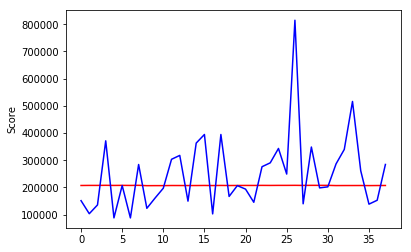

In [152]:
#Visualization
import matplotlib.pyplot as plt
plt.plot(indexes,ynew,color='red')
plt.plot(indexes,Y,color='blue')
plt.ylabel('Score')
plt.show()

In [176]:
#Attempting using ZScores instead
df['t1_zscore'] = (df['t1_cutoff'] - df['t1_cutoff'].mean())/df['t1_cutoff'].std()   
df.head()

,game_mltd,idol_arisa matsuda,idol_ayumi maihama,idol_emily stewart,idol_fukuda noriko,idol_hakozaki serika,idol_handa roco,idol_hibiki ganaha,idol_hoshii miki,idol_ibuki tsubasa,...,year,month,duration,t1_cutoff,t2_cutoff,t3_cutoff,t4_cutoff,t5_cutoff,t6_cutoff,t1_zscore
0,1,0,0,0,0,0,0,0,0,0,...,2017,8,9,151347,67477,45991,36947,28172,10044,-0.7063064315
1,1,0,0,0,0,0,0,0,0,0,...,2017,9,11,103398,54179,43411,36993,25865,4031,-1.0505820044
2,1,0,0,0,0,0,0,0,0,0,...,2017,9,11,135591,56477,41397,36207,23472,2942,-0.8194350875
3,1,0,0,0,0,0,0,0,0,0,...,2017,10,11,371237,137697,83660,65680,51883,8304,0.8725118072
4,1,0,0,0,0,0,0,0,0,0,...,2017,11,9,88037,44374,36350,26413,18029,1451,-1.1608745459


In [220]:
#Split data
# split into input (X) and output (Y) variables
dataset = df.values
X = dataset[:,0:42]
Y = dataset[:,48]

In [221]:
def final_model_zscore():
    # create model
    model = Sequential()
    model.add(Dense(42, input_dim=42, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.add(Dense(1, activation='linear'))
#     # Compile model
#     model.compile(optimizer = optimizers.RMSprop(lr=0.0001), loss = losses.mean_squared_logarithmic_error, metrics =[metrics.categorical_accuracy])
#     model.fit(X, Y, epochs=1000, verbose=0)
    #MAE
    model.compile(loss='mean_absolute_error', optimizer='rmsprop')
    model.fit(X, Y, epochs=1000,batch_size=16,verbose=0)
#     #MSE
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     model.fit(X, Y, epochs=1000, verbose=0)
    return model

In [222]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=final_model_zscore, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Final: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Final: -0.50 (0.22) MAE


In [223]:
ynew = final_model_zscore().predict(X)
indexes = [0]*len(X)
for i in range(len(X)):
    print("Actual=%s, Predicted=%s" % (Y[i], ynew[i]))
    indexes[i] = i

Actual=-0.7063064314596538, Predicted=[0.02876151]
Actual=-1.0505820043569143, Predicted=[-0.03594137]
Actual=-0.8194350874601801, Predicted=[0.00747623]
Actual=0.8725118071767856, Predicted=[0.9385016]
Actual=-1.1608745459172143, Predicted=[-0.15265834]
Actual=-0.3061988942909986, Predicted=[0.5084694]
Actual=-1.1617720504869062, Predicted=[-0.19574395]
Actual=0.24787016678088622, Predicted=[0.7763569]
Actual=-0.9082449596403344, Predicted=[0.08276911]
Actual=-0.63689701805796, Predicted=[0.53578514]
Actual=-0.377546917563227, Predicted=[0.2831736]
Actual=0.3851955459803066, Predicted=[0.96495533]
Actual=0.48804238963044233, Predicted=[0.69702023]
Actual=-0.7189935560568187, Predicted=[0.49890995]
Actual=0.8130970046631809, Predicted=[0.77416486]
Actual=1.0401656607952352, Predicted=[1.0511048]
Actual=-1.0555649497278439, Predicted=[-0.01669721]
Actual=1.0398138390039158, Predicted=[1.0710851]
Actual=-0.5949656045619537, Predicted=[0.08846806]
Actual=-0.30901346862155243, Predicted=[0

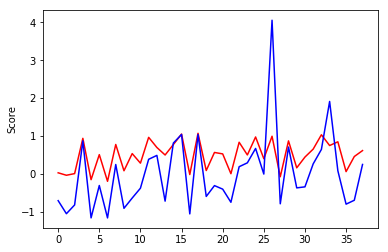

In [225]:
#Visualization
import matplotlib.pyplot as plt
plt.plot(indexes,ynew,color='red')
plt.plot(indexes,Y,color='blue')
plt.ylabel('Score')
plt.show()

In [226]:
#Visualize regularized
Y_reg = df['t1_cutoff']
indexes = [0]*len(X)
y_pred_normalized = [0]*len(X)
for i in range(len(X)):
    res = (ynew[i]*Y_reg.std())+Y_reg.mean()
    print("Actual=%s, Predicted=%s" % (Y_reg[i], res))
    indexes[i] = i
    y_pred_normalized[i] = res

Actual=151347, Predicted=[253723.64]
Actual=103398, Predicted=[244712.14]
Actual=135591, Predicted=[250759.12]
Actual=371237, Predicted=[380427.75]
Actual=88037, Predicted=[228456.38]
Actual=207072, Predicted=[320535.]
Actual=87912, Predicted=[222455.62]
Actual=284240, Predicted=[357845.03]
Actual=123222, Predicted=[261245.55]
Actual=161014, Predicted=[324339.38]
Actual=197135, Predicted=[289156.9]
Actual=303366, Predicted=[384112.1]
Actual=317690, Predicted=[346795.4]
Actual=149580, Predicted=[319203.6]
Actual=362962, Predicted=[357539.75]
Actual=394587, Predicted=[396110.56]
Actual=102704, Predicted=[247392.38]
Actual=394538, Predicted=[398893.3]
Actual=166854, Predicted=[262039.27]
Actual=206680, Predicted=[328513.38]
Actual=193671, Predicted=[323231.62]
Actual=145371, Predicted=[250408.69]
Actual=276096, Predicted=[366005.47]
Actual=290383, Predicted=[319384.16]
Actual=343241, Predicted=[385440.]
Actual=249112, Predicted=[305726.72]
Actual=814482, Predicted=[388132.2]
Actual=139831

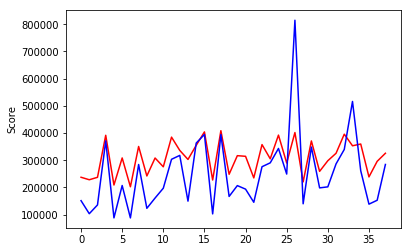

In [217]:
#Visualization
import matplotlib.pyplot as plt
plt.plot(indexes, y_pred_normalized,color='red')
plt.plot(indexes,Y_reg,color='blue')
plt.ylabel('Score')
plt.show()